In [1]:
import numpy as np
import qutip as qt
import scipy as sp
import scipy.linalg as spla
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from tqdm import tqdm
import os
from joblib import Parallel, delayed
import warnings
from scipy.sparse import SparseEfficiencyWarning
import pickle
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")

import sBs
import bits
import metrology
import importlib
import plotsmodule
importlib.reload(plotsmodule)
importlib.reload(sBs)
importlib.reload(bits)
importlib.reload(metrology)
from sBs import *
from bits import *
from metrology import *
from plotsmodule import *

In [2]:
path = os.getcwd()
path_sBs = path+'/sBs-noiseless'
path_figures = path_sBs + '/figures/'
path_figures_data = path_sBs + '/figures/data/'
path_data_sBs = path_sBs+'/sBs/'
path_data_sBs_sensor = path_sBs+'/sBs/sensor/'
path_data_sBs_probabilities = path_sBs+'/sBs/probabilities/'
path_data_sBs_stabilizers = path_sBs+'/sBs/stabilizers/'
path_data_sBs_photons = path_sBs+'/sBs/photons/'
path_data_wigners = path_sBs+'/wigners/'
path_data_sBs_gauge  = path_sBs+'/sBs/gauge/'
os.makedirs(path_figures, exist_ok=True)
os.makedirs(path_figures_data, exist_ok=True)
os.makedirs(path_data_sBs, exist_ok=True)
os.makedirs(path_data_sBs_sensor, exist_ok=True)
os.makedirs(path_data_sBs_probabilities, exist_ok=True)
os.makedirs(path_data_wigners, exist_ok=True)
os.makedirs(path_data_sBs_stabilizers, exist_ok=True)
os.makedirs(path_data_sBs_photons, exist_ok=True)
os.makedirs(path_data_sBs_gauge, exist_ok=True)

# Probabilities after one single subround and fitting a

In [29]:
R0 = 120
Delta_range = np.arange(0.25,0.36,.01)
Delta_range= [0.3]
steps = 16
p0_range = (l/steps)*np.arange(0,steps+1,1)
probs_q = []
probs_p = []
gauges =[0,0] 
q0 = l/4
for Delta in tqdm(Delta_range):
    probs_q_delta = []
    probs_p_delta = []
    for p0 in p0_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_sBs_sensor+name)
        R = 1
        alpha = (q0+1j*p0)/np.sqrt(2)
        print(p0)
        rho0 = Displacement(alpha)@sensor@Displacement(-alpha)
        rhos, probs_gq, probs_gp = sBs_cycle(Delta,R,rho0,gauges)
        probs_q_delta.append(probs_gq[0])
        probs_p_delta.append(probs_gp[0])
    probs_q.append(probs_q_delta)
    probs_p.append(probs_p_delta)
probs_q = np.array(probs_q)
probs_p = np.array(probs_p)
print(probs_q.shape)
name = 'probabilities_q_single_subround_q0_range(0,lhalf,16)'
np.save(path_data_sBs_probabilities+name,probs_q)

  0%|          | 0/1 [00:00<?, ?it/s]

0.0
0.15666426716443752
0.31332853432887503
0.4699928014933126
0.6266570686577501
0.7833213358221875
0.9399856029866251
1.0966498701510625
1.2533141373155001
1.4099784044799377
1.566642671644375
1.7233069388088127
1.8799712059732503
2.0366354731376877
2.193299740302125
2.349964007466563
2.5066282746310002


100%|██████████| 1/1 [00:10<00:00, 10.67s/it]

(1, 17)


[192.70032915] [[2.41251397e+14]]


(0.0, 0.25)

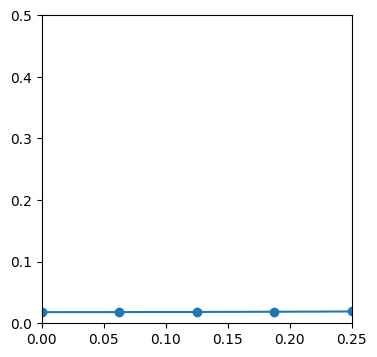

In [31]:
name = 'probabilities_q_single_subround_q0_range(0,lhalf,16).npy'
probs_q = np.load(path_data_sBs_probabilities+name)
Delta_range = np.arange(0.25,0.36,.01)
Delta_range= [0.3]

steps = 16
q0_range = (l/steps)*np.arange(0,steps+1,1)
fig, ax = plt.subplots(figsize=(4,4))
for i in range(len(Delta_range)):
    ax.plot(q0_range/l,1-probs_q[i],'o-',label=r'$\Delta={0:.2f}$'.format(Delta_range[i]))

for i in range(len(Delta_range)):
    Delta = Delta_range[i]
    cd = np.cosh(Delta**2)
    def probability_function(q0,a):
        return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2
    popt, pcov = curve_fit(probability_function, q0_range, 1-probs_q[i])
    print(popt,pcov)

ax.set_ylim(0,.5)
ax.set_xlim(0,.25)

In [13]:
# R0 = 120
# Delta_range = [.25,.3,.35]
# steps = 48
# q0_range = (l/2/steps)*np.arange(0,steps+1,1)
# probs_q = []
# for Delta in tqdm(Delta_range):
#     probs_q_delta = []
#     for q0 in q0_range:
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#         sensor = sps.load_npz(path_data_sBs_sensor+name)
#         R = 1
#         rho0 = Displacement(q0/np.sqrt(2))@sensor@Displacement(-q0/np.sqrt(2))
#         rhos, probs_gq, probs_gp = sBs_cycle(Delta,R,rho0)
#         probs_q_delta.append(probs_gq[0])
#     probs_q.append(probs_q_delta)
# probs_q = np.array(probs_q)
# print(probs_q.shape)
# name = 'probabilities_q_single_subround_q0_range(0,lhalf,48)_delta(25,30,35)'
# np.save(path_data_sBs_probabilities+name,probs_q)

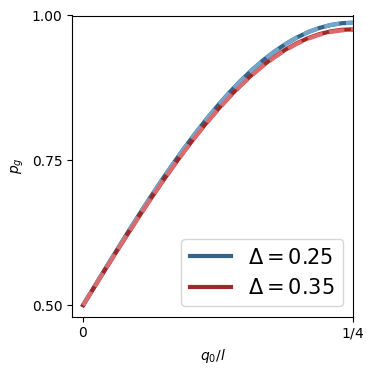

In [14]:
#appendix plot
name = 'probabilities_q_single_subround_q0_range(0,lhalf,48)_delta(25,30,35).npy'
probs_q = np.load(path_data_sBs_probabilities+name)
a = 0.4
Delta_range = [.25,.35]
steps = 48
q0_range = (l/2/steps)*np.arange(0,steps+1,1)
fig, ax = plt.subplots(figsize=(4,4))
colors = [blue,red]
for i in range(len(Delta_range)):
    Delta = Delta_range[i]
    cd = np.cosh(Delta**2)
    def probability_function(q0,a):
        return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2
    ax.plot(q0_range/l,probability_function(q0_range,a),'-',label=r'$\Delta={0:.2f}$'.format(Delta),lw=3,color=colors[i])

plt.rcParams.update({'font.size': 15})
ax.plot(q0_range/l,1-probs_q[0],ls='--',lw=3,color=lighten_color(blue,.6))
ax.plot(q0_range/l,1-probs_q[-1],ls='--',lw=3,color=lighten_color(red,.6))

ax.set_xlabel(r'$q_0/l$')
ax.set_ylabel(r'$p_g$')
ax.set_yticks([.5,.75,1])
ax.set_xticks([0,.25])
ax.set_xticklabels([r'$0$',r'$1/4$'])
ax.set_xlim(-.01,.25)

ax.legend(loc='lower right')
ax.set_ylim(.48,1.0)
plt.tight_layout()
plt.savefig(path_figures+'sBs_probabilities_q_Delta(25,35)_range(0,lhalf).pdf')

# Difference between averaging or not in a single round

In [15]:
# # probability of p after averaging or not over q
# def sBs_p_measurement(mu,Delta):
#     #corresponds to pg \simeq (1-nu\sin(lp))/2
#     sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
#     large, small = l*cd, 1j*l*sd/2
#     nu = (-1)**mu
#     return I_Rx(-nu*np.pi/2)@CD(large)@I_Rx(np.pi/2)@CD(small)
# def sBs_q_measurement(mu,Delta):
#     #corresponds to pg \simeq (1-nu\sin(lq))/2
#     sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
#     large, small = -1j*l*cd, l*sd/2
#     nu = (-1)**mu
#     return I_Rx(-nu*np.pi/2)@CD(large)@I_Rx(np.pi/2)@CD(small)

# def sBs_single_round(Delta,sensor,p0,q0):

#     beta = (q0 + 1j*p0)/np.sqrt(2)
#     U_q0p0 = Displacement(beta)
#     rho0 = U_q0p0@sensor@U_q0p0.getH()

#     Uq0, Uq1  = sBs_q_measurement(0,Delta), sBs_q_measurement(1,Delta)
#     Up0, Up1 = sBs_p_measurement(0,Delta), sBs_p_measurement(1,Delta)
#     sd, cd = np.sinh(Delta**2), np.cosh(Delta**2)
#     smallq, smallp = l*sd/2, 1j*l*sd/2
#     Uqg, Uqe = Displacement(-smallq/2/np.sqrt(2)), Displacement(smallq/2/np.sqrt(2))
#     Upg, Upe = Displacement(-smallp/2/np.sqrt(2)), Displacement(smallp/2/np.sqrt(2))

#     Kgq0, Keq0 = Krauss_from_U(Uq0)
#     Kgq1, Keq1 = Krauss_from_U(Uq1)
#     Kgp0, Kep0 = Krauss_from_U(Up0)
#     Kgp1, Kep1 = Krauss_from_U(Up1)
#     Krauss_dictionary = {'Kgq0':Kgq0,'Keq0':Keq0,'Kgq1':Kgq1,'Keq1':Keq1,'Kgp0':Kgp0,'Kep0':Kep0,'Kgp1':Kgp1,'Kep1':Kep1}

#     rho = rho0.copy()
#     rhos = [rho.copy()]
#     probs_b = []
#     mu_q, mu_p = 0, 0 #initialize the gauges
#     Kgq, Keq = Krauss_dictionary[f'Kgq{mu_q}'], Krauss_dictionary[f'Keq{mu_q}']
#     pgq = np.real((Kgq.getH()@Kgq@rho).diagonal().sum())
#     rhog =Uqg @ Kgq @ rho @ Kgq.getH() @ Uqg.getH()/pgq
#     rhoe =Uqe @ Keq @ rho @ Keq.getH() @ Uqe.getH()/(1-pgq)
#     mu_q = (mu_q +1)% 2
#     Kgp, Kep = Krauss_dictionary[f'Kgp{mu_p}'], Krauss_dictionary[f'Kep{mu_p}']
#     pgp_g = np.real((Kgp.getH()@Kgp@rhog).diagonal().sum())#(ppg|qg)
#     pgp_e = np.real((Kgp.getH()@Kgp@rhoe).diagonal().sum())#(ppg|qe)
#     pge_g = np.real((Kep.getH()@Kep@rhog).diagonal().sum())#(ppe|qg)
#     pge_e = np.real((Kep.getH()@Kep@rhoe).diagonal().sum())#(ppe|qe)
#     return np.array([pgp_g, pgp_e, pge_g, pge_e])

# def sbs_avg_single_round(Delta,sensor,p0,q0):
    
#     beta = (q0 + 1j*p0)/np.sqrt(2)
#     U_q0p0 = Displacement(beta)
#     rho0 = U_q0p0@sensor@U_q0p0.getH()
    
#     Uq0, Uq1  = sBs_q(0,Delta), sBs_q(1,Delta)
#     Up0, Up1 = sBs_p(0,Delta), sBs_p(1,Delta)

#     Kgq0, Keq0 = Krauss_from_U(Uq0)
#     Kgq1, Keq1 = Krauss_from_U(Uq1)
#     Kgp0, Kep0 = Krauss_from_U(Up0)
#     Kgp1, Kep1 = Krauss_from_U(Up1)
#     Krauss_dictionary = {'Kgq0':Kgq0,'Keq0':Keq0,'Kgq1':Kgq1,'Keq1':Keq1,'Kgp0':Kgp0,'Kep0':Kep0,'Kgp1':Kgp1,'Kep1':Kep1}

#     rho = rho0.copy()
#     rhos = [rho.copy()]
#     mu_q, mu_p = 0, 1 #initialize the gauges
#     Kgq, Keq = Krauss_dictionary[f'Kgq{mu_q}'], Krauss_dictionary[f'Keq{mu_q}']
#     Kgp, Kep = Krauss_dictionary[f'Kgp{(mu_p+1)%2}'], Krauss_dictionary[f'Kep{(mu_p+1)%2}']
#     pq = (Kgq.getH()@Kgq@rho).diagonal().sum()
#     pp = (Kgp.getH()@Kgp@rho).diagonal().sum()
#     probs_gq, probs_gp = [pq], [pp]
#     for i in range(1):
#         Kgq, Keq = Krauss_dictionary[f'Kgq{mu_q}'], Krauss_dictionary[f'Keq{mu_q}']
#         Kgp, Kep = Krauss_dictionary[f'Kgp{mu_p}'], Krauss_dictionary[f'Kep{mu_p}']
#         mu_p = (mu_p +1)% 2#gauge update
#         mu_q = (mu_q +1)% 2
#         probs_gq.append((Kgq.getH()@Kgq@rho).diagonal().sum())
#         rho = Kgq @ rho @ Kgq.getH() + Keq @rho @ Keq.getH()
#         probs_gp.append((Kgp.getH()@Kgp@rho).diagonal().sum())
#         rho = Kgp @ rho @ Kgp.getH() + Kep @rho @ Kep.getH()
#         rhos.append(rho.copy())
    
#     return np.real(probs_gp)

# def sBs_single_round_parallel(Delta,sensor,p0,q0_range):
#     return Parallel(n_jobs=16)(delayed(sBs_single_round)(Delta,sensor,p0,q0) for q0 in q0_range)

# def sBs_avg_single_round_parallel(Delta,sensor,p0,q0_range):
#     return Parallel(n_jobs=16)(delayed(sbs_avg_single_round)(Delta,sensor,p0,q0) for q0 in q0_range)

# R0 = 120
# Delta = 0.3
# name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
# sensor = sps.load_npz(path_data_sBs_sensor+name)
# q0, p0 = 0, 0
# steps = 32
# q0_range = (l/2/steps)*np.arange(0,steps+1,1)
# p0_range = (l/2/steps)*np.arange(0,steps+1,1)
# probs_b = []
# probs_b_avg = []
# for p0 in tqdm(p0_range):
#     probs_b_p0 = sBs_single_round_parallel(Delta,sensor,p0,q0_range)
#     p_b_p0 = sBs_avg_single_round_parallel(Delta,sensor,p0,q0_range)
#     probs_b.append(probs_b_p0)
#     probs_b_avg.append(p_b_p0)

# probs_b = np.array(probs_b)
# probs_b_avg = np.array(probs_b_avg)
# name = 'probabilities_b_single_subround_q0_range(0,lhalf,32)_p0_range(0,lhalf,32)_Delta=0.30'
# np.save(path_data_sBs_gauge+name,probs_b)
# name = 'probabilities_b_avg_single_subround_q0_range(0,lhalf,32)_p0_range(0,lhalf,32)_Delta=0.30'
# np.save(path_data_sBs_gauge+name,probs_b_avg)


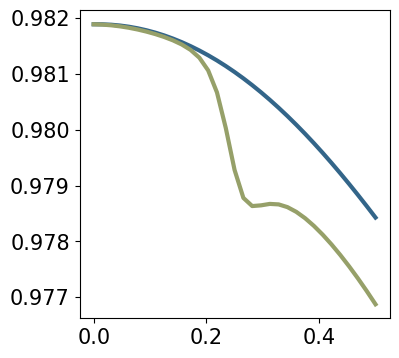

In [16]:
R0 = 120
Delta = 0.3
name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
sensor = sps.load_npz(path_data_sBs_sensor+name)
q0, p0 = 0, 0
steps = 32
q0_range = (l/2/steps)*np.arange(0,steps+1,1)
p0_range = (l/2/steps)*np.arange(0,steps+1,1)

name = 'probabilities_b_single_subround_q0_range(0,lhalf,32)_p0_range(0,lhalf,32)_Delta=0.30.npy'
probs_b = np.load(path_data_sBs_gauge+name)
name = 'probabilities_b_avg_single_subround_q0_range(0,lhalf,32)_p0_range(0,lhalf,32)_Delta=0.30.npy'
probs_b_avg = np.load(path_data_sBs_gauge+name)

p0 = l/4
index_p0 = np.argmin(np.abs(p0_range-p0))
probs_p0 = probs_b[index_p0]
probs_p0_avg = probs_b_avg[index_p0]

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(q0_range/l,1-probs_p0[:,0],'-',label=r'$p_g$',color=blue,lw=3)
ax.plot(q0_range/l,1-probs_p0[:,1],'-',label=r'$p_e$',color=green,lw=3)
# ax.plot(q0_range/l,probs_p0_avg[:,0],'-',label=r'$p_{avg}$',color=lighten_color(red,.6),lw=3)
# ax.plot(q0_range/l,probs_p0_avg[:,1],'-',label=r'$p_{avg}$',color=red,lw=3)
# ax.set_ylim(.49,1.01)


# Preparing sensor states starting in the vacuum

In [6]:
Delta_range = np.arange(0.25,0.41,.01)
Delta_range = [.3]
R_range = [120]
gauges = [0,0]
for R in R_range:
    for Delta in tqdm(Delta_range):
        rhos, probs_gq, probs_gp = sBs_cycle(Delta,R,rho_vacuum,gauges)
        rho = rhos[-1]
        name = 'sensor_Delta={0:.2f}_R={1:.0f}_test'.format(Delta,R)
        # print(type(rho))
        sps.save_npz(path_data_sBs_sensor + name + '.npz', rho)
        # rho = qt.Qobj(rho)
        # qt.qsave(rho,path+'/sbs-noise/Input_states/sensor_state_delta-{0:.0f}-Nc140'.format(Delta*100))

100%|██████████| 1/1 [00:05<00:00,  5.18s/it]


In [7]:
Delta, R = 0.3, 120
name = 'sensor_Delta={0:.2f}_R={1:.0f}_test.npz'.format(Delta,R)
sensor = sps.load_npz(path_data_sBs_sensor+name)
Tq, Tp = stabilizers(Delta)

print('stabilizers',(Tq@sensor).diagonal().sum(),(Tp@sensor).diagonal().sum())
photons = (n_op@sensor).diagonal().sum()
print('photons',np.real(photons), (1-Delta**2)/2/Delta**2)

gamma = (0.4+0.2j)/np.sqrt(2)
U_gamma = Displacement(gamma)
sensor_gamma = U_gamma@sensor@U_gamma.getH()

fock = sps.csc_matrix(qt.fock(N,3))
E_q_fock = (q_op @ fock).diagonal().sum()
E_p_fock = (p_op @ fock).diagonal().sum()
qp_fock = (q_op @ p_op @ fock).diagonal().sum()
pq_fock = (p_op @ q_op @ fock).diagonal().sum()
print('covariance fock', (qp_fock+pq_fock)/2-E_q_fock*E_p_fock)


E_q = (q_op @ sensor).diagonal().sum()
E_p = (p_op @ sensor).diagonal().sum()
qp = (q_op @ p_op @ sensor).diagonal().sum()
pq = (p_op @ q_op @ sensor).diagonal().sum()
qp_gamma = (q_op @ p_op @ sensor_gamma).diagonal().sum()
pq_gamma = (p_op @ q_op @ sensor_gamma).diagonal().sum()
Var_q = (q_op @ q_op @ sensor).diagonal().sum()
Var_p = (p_op @ p_op @ sensor).diagonal().sum()
print('qp',qp)
print('pq',pq)
print('Var_q',Var_q)
print('Var_p',Var_p)
print('Var_q + Var_p',Var_q + Var_p, '2n+1',2*photons+1)
print('qp_gamma',qp_gamma)
print('pq_gamma',pq_gamma)
print('Covariance GKP', (qp+pq)/2-E_q*E_p)

sensor = qt.Qobj(sensor)
print(sensor.tr())
xvec = np.arange(-2*l,2*l,0.05)

# r = np.arcsinh(np.sqrt(np.real(photons)))
# squeezed_state = qt.Qobj(qt.squeeze(N,r) * qt.basis(N, 0))
# W_squeezed = qt.wigner(squeezed_state, xvec, xvec)
W = qt.wigner(sensor, xvec, xvec)

# number_operator = qt.num(N)
# photons_GKP = (number_operator*qt.Qobj(sensor)).tr()
# print('photons_GKP',photons_GKP,Delta)
# photons_squeezed = qt.expect(number_operator, squeezed_state)
# print('photons_squeezed',photons_squeezed, np.sinh(r)**2)
# print('N',N)

stabilizers (1.0080302030282844+2.278720589545612e-17j) (1.0080469166326356+4.850089090868405e-17j)
photons 5.273124881225138 5.055555555555556
covariance fock 0j
qp (-2.665913649049171e-16+0.5000002337814126j)
pq (-2.6659136490491693e-16-0.5000002337814128j)
Var_q (5.773358818953755+6.862682721795497e-31j)
Var_p (5.77289141105934+8.267501914531003e-31j)
Var_q + Var_p (11.546250230013094+1.51301846363265e-30j) 2n+1 (11.546249762450277+1.3587296377725172e-30j)
qp_gamma (0.08000003740377966+0.5000002337807742j)
pq_gamma (0.0800000374037796-0.5000002337807743j)
Covariance GKP (-2.6659136490491703e-16-1.1102230246251565e-16j)
1.0000004675638123


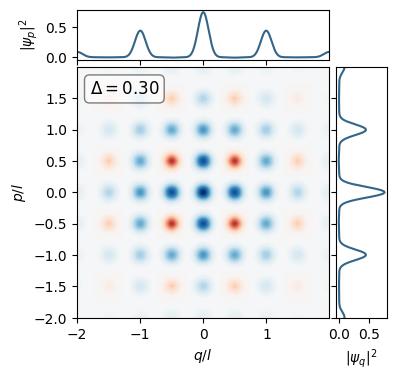

In [8]:
# Assuming W, xvec, and l are already defined
row_marginal = np.sum(W, axis=0)*(xvec[1]-xvec[0])
column_marginal = np.sum(W, axis=1)*(xvec[1]-xvec[0])
# row_squeezed_marginal = np.sum(W_squeezed, axis=0)*(xvec[1]-xvec[0])
# column_squezeed_marginal = np.sum(W_squeezed, axis=1)*(xvec[1]-xvec[0])

max_row = np.max(row_marginal).copy()
# max_squeezed = np.max(row_squeezed_marginal)
# row_squeezed_marginal = row_squeezed_marginal*(max_row/max_squeezed)# Normalize the color scale
nrm = mpl.colors.Normalize(-W.max(), W.max())

# Create the main plot and the marginal plots
fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(2, 2, width_ratios=(5, 1), height_ratios=(1, 5), hspace=0.05, wspace=0.05)

# Main contour plot
ax_main = fig.add_subplot(gs[1, 0])
contour = ax_main.contourf(xvec/l, xvec/l, W, 100, cmap=cm.RdBu, norm=nrm)
ax_main.set_xlabel(r'$q/l$')
ax_main.set_ylabel(r'$p/l$')

# Row marginal plot
ax_row = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_row.plot(xvec/l, row_marginal, color=blue)
# ax_row.plot(xvec/l, row_squeezed_marginal, color=green)
ax_row.set_ylabel(r'$|\psi_p|^2$')
ax_row.xaxis.set_tick_params(labelbottom=False)

# Column marginal plot
ax_col = fig.add_subplot(gs[1, 1], sharey=ax_main)
ax_col.plot(column_marginal, xvec/l, color=blue)
ax_col.set_xlabel(r'$|\psi_q|^2$')
ax_col.yaxis.set_tick_params(labelleft=False)

# Add textbox with the value of Delta
textstr = r'$\Delta = {0:.2f}$'.format(Delta)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax_main.text(0.05, 0.95, textstr, transform=ax_main.transAxes, fontsize=12,
             verticalalignment='top', bbox=props)

plt.show()

# Maps of each bitstring. Variance of $\boldsymbol b^q$ ($\boldsymbol b^p$) respect p (q)

## Getting the variances

### first, obtaining the probabilities

In [ ]:
# # getting the variances up to T=7
# Delta = 0.3
# R0 = 120
# gauges = [0,0]
# name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
# sensor = sps.load_npz(path_data_sBs_sensor+name)
# T_range = np.arange(1,8,1)
# q0 = l/8
# steps_range = [16]
# for T in T_range:
#     for steps in steps_range:
#         probs_allbits_pq = []
#         p0_range = (l/2)*np.linspace(-.95,.95,steps)
#         for p0 in tqdm(p0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_pq.append(probs_b)
#         probs_allbits_pq = np.array(probs_allbits_pq)
#         name = 'probs_allbits_pq_q0=lD8_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}'.format(steps,Delta,T)#D\equiv /, division
#         np.save(path_data_sBs_probabilities+name,probs_allbits_pq)

In [ ]:
# # # getting the variances up to T=7
# Delta = 0.3
# R0 = 120
# gauges = [0,0]
# name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
# sensor = sps.load_npz(path_data_sBs_sensor+name)
# T_range = np.arange(1,8,1)
# # T_range = np.arange(1,3,1)
# q0 = l/4
# steps_range = [16]
# for T in T_range:
#     for steps in steps_range:
#         probs_allbits_pq = []
#         p0_range = (l/2)*np.linspace(-.95,.95,steps)
#         for p0 in tqdm(p0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_pq.append(probs_b)
#         probs_allbits_pq = np.array(probs_allbits_pq)
#         name = 'probs_allbits_pq_q0=lD4_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}'.format(steps,Delta,T)#D\equiv /, division
#         np.save(path_data_sBs_probabilities+name,probs_allbits_pq)

### second, obtain the mean and variance

(array([2.75748020e-03, 1.13540232e-04, 2.64553270e-04, 3.48567331e-05,
       7.21924236e-04, 7.75162858e-05, 7.55475655e-05, 1.41946709e-05,
       1.27352157e-03, 1.55374436e-04, 1.12321378e-04, 1.62609969e-05,
       8.80980370e-05, 1.66331606e-05, 1.73549114e-05, 5.55606085e-06]), array([ 0,  8, 15,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15]))
[1.41957261e-03 8.11972049e-05 1.23445605e-04 1.51267002e-05
 3.75601767e-04 3.77766653e-05 3.72641016e-05 6.75727211e-06
 6.96087938e-04 8.25855104e-05 5.86217562e-05 7.83762903e-06
 4.59413658e-05 8.05704712e-06 8.55321805e-06 3.19815156e-06]


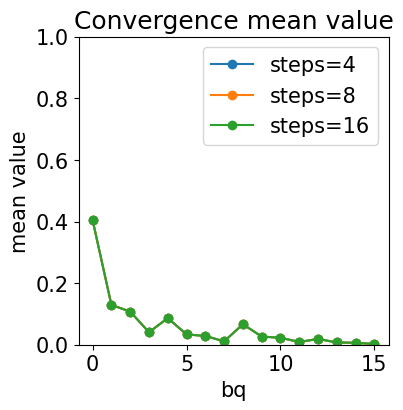

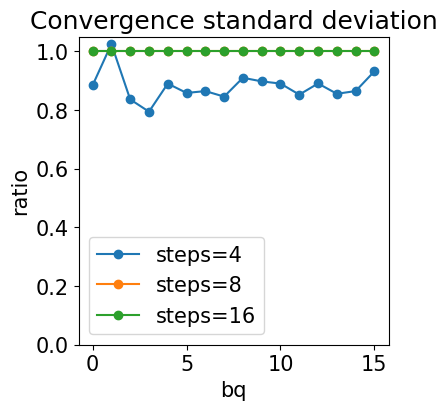

In [ ]:
from variances import *

def convergence_mean(steps_range,steps_saved,T,Delta):#for the mean 1 step is enough, no dependency in p
    fig, ax = plt.subplots(figsize=(4,4))
    name = 'probs_allbits_pq_q0=lD8_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
    probs_allbits_pq = np.load(path_data_sBs_probabilities+name)
    for steps in steps_range:
        probs_allbits_pq_step = probs_allbits_pq[::int(steps_saved/steps)]
        probs_bq = mean_probs_bq(probs_allbits_pq_step,T)
        
        ax.plot(probs_bq,'o-',label='steps={0:.0f}'.format(steps))
    ax.set_ylim(0,1)
    ax.set_title('Convergence mean value')
    ax.set_xlabel('bq')
    ax.set_ylabel('mean value')
    ax.legend()
    plt.show()
    return None

def convergence_stddev(steps_range, steps_saved, T, Delta):
    name = 'probs_allbits_pq_q0=lD8_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
    probs_allbits_pq = np.load(path_data_sBs_probabilities+name)    
    fig, ax = plt.subplots(figsize=(4,4))
    stddev_max = stddev_probs_bq(probs_allbits_pq,T)
    for steps in steps_range:#convergence is check for steps = 8. So, for extra safety we will go to 12 steps. 
        mean = mean_probs_bq(probs_allbits_pq[::int(steps_saved/steps)],T)
        stddev = stddev_probs_bq(probs_allbits_pq[::int(steps_saved/steps)],T)
        ratios = stddev_max/stddev
        ax.plot(ratios,'o-',label='steps={0:.0f}'.format(steps))
    ax.set_ylim(0,1.05)
    ax.set_title('Convergence standard deviation')
    ax.set_xlabel('bq')
    ax.set_ylabel('ratio')
    ax.legend()
    plt.show()
    return None
    
Delta = 0.3
T = 4
q0 = l/8
steps_saved = 16
steps_range = [4,8,16]
name = 'probs_allbits_pq_q0=lD8_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
probs_allbits_pq = np.load(path_data_sBs_probabilities+name)
print(maximal_deviation_probs_bq(probs_allbits_pq,T))
print(stddev_probs_bq(probs_allbits_pq,T))
convergence_mean(steps_range,steps_saved,T,Delta)#converges at step 1
convergence_stddev(steps_range, steps_saved, T, Delta)#converged at step 8 for l/4, at 16 for l/8

### variances plot

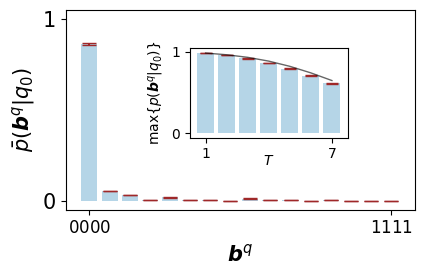

In [ ]:
#plotting mean and standard deviation for all bits up to T=5. 
steps_saved = 16
# steps_saved = 32 l/8
Delta = 0.3
T = 4
name = 'probs_allbits_pq_q0=lD4_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}'.format(steps_saved,Delta,T)#D\equiv /, division
probs_allbits_pq = np.load(path_data_sBs_probabilities+name+'.npy')    

mean = mean_probs_bq(probs_allbits_pq,T)
stddev = stddev_probs_bq(probs_allbits_pq,T)

T_range = np.arange(1,8,1)
# means, stddevs, indices = [], [], []
# for T in T_range:
#     name = 'probs_allbits_pq_q0=lD8_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
#     probs_allbits_pq = np.load(path_data_sBs_probabilities+name)
#     mean_T = mean_probs_bq(probs_allbits_pq,T)
#     stddev_T = stddev_probs_bq(probs_allbits_pq,T)
#     means.append(np.max(mean_T))
#     indices.append(np.argmax(mean_T))
#     stddevs.append(stddev_T[indices[-1]])
# name = 'means_stddevs_bq_Delta={0:.2f}_T=1to7_q0=lD8'.format(Delta)
# np.save(path_figures_data+name,np.array([means,stddevs,indices]))

fig, ax = plt.subplots(figsize=(4.5,3))
# Define the x values (bitstring indices)
x_values = np.arange(len(mean))
# Plot the mean probabilities with error bars representing the standard deviation
# plt.errorbar(x_values, mean, yerr=stddev, fmt='o', ecolor=red, capsize=5, label='Mean with Std Dev',markerfacecolor='none', markeredgecolor=blue)
plt.bar(x_values, mean, yerr=stddev, ecolor=red, capsize=5, label='Mean with Std Dev',color=light_blue,alpha=.6)

# Add labels and title
plt.xlabel(r'$\boldsymbol{b}^q$')
plt.ylabel(r'$\bar p(\boldsymbol{b}^q| q_0)$')
ax.set_ylim(-.05,1.05)
ax.set_yticks([0,1])

xticks = [0,15]
xtickslabels = [r'$0000$',r'$1111$']
plt.xticks(xticks, xtickslabels,fontsize=12)
# Show the plot

name = 'means_stddevs_bq_Delta={0:.2f}_T=1to7'.format(Delta)#l/4
# name = 'means_stddevs_bq_Delta={0:.2f}_T=1to7_q0=lD8'.format(Delta)#l/8
means_stddevs_indices = np.load(path_figures_data+name+'.npy')
means = means_stddevs_indices[0]
stddevs = means_stddevs_indices[1]
indices = means_stddevs_indices[2]

# Create an inset
inset_ax = fig.add_axes([0.45, 0.5, 0.35, 0.3])  # [left, bottom, width, height]
# inset_ax.set_title('Inset')
means = np.array(means)
stddevs = np.array(stddevs)
indices = np.array(indices)
inset_ax.bar(T_range, means, yerr=stddevs, ecolor=red, capsize=4, label='Mean with Std Dev',color=light_blue,alpha=.6)
inset_ax.set_xlabel(r'$T$',labelpad =-5,fontsize=10)
inset_ax.set_ylabel(r'max$\{p(\boldsymbol{b}^q|q_0)\}$',fontsize=10)
inset_ax.set_xticks([1,7])
inset_ax.set_ylim(-.05,1.05)
inset_ax.tick_params(axis='both', which='major', labelsize=10)
inset_ax.set_yticks([0,1])

def improved_fit(Delta,q0,R1): #this would be actual function written in the main, it also works, it was just harder to write a fit code as curve_fit doesn't take it.
    a,b,c = 0.4, 1.44, 0.44
    q_list = [q0]
    p_list = [(1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2]
    for T in np.arange(1,R1+1,1):
        qt = q_list[T-1].copy()
        rate2 = b-c*np.abs(np.sin(l*qt))
        qt = q0*np.exp(-rate2*Delta**2*T)
        q_list.append(qt)
        pgt = (1+np.exp(-a*Delta**2)*np.sin(l*cd*qt))/2
        p_list.append(pgt)
    return np.array(p_list)

q0, T = l/4, 7
pgs = improved_fit(Delta,q0,T)
probs_allzeros = []
for i in range(T):
    probs_allzeros.append(np.prod(pgs[:i+1]))
probs_allzeros = np.array(probs_allzeros)

inset_ax.plot(T_range,probs_allzeros,'-',label='fit',color='black',lw=1,alpha=.6)

dict_figure = {'means-inset':means,'stddevs-inset':stddevs,'x-axis-inset':T_range,'means':mean,'stddevs':stddev,'x-axis':x_values}
name = 'appendix-sBs-mean-stddev-Delta={0:.2f}_T={1:.0f}_q0=lD4_dict_arrays'.format(Delta,T)
with open(path_figures_data+name, 'wb') as file:
    pickle.dump(dict_figure, file)

T = 4
plt.tight_layout()
name = 'appendix-sBs-mean-stddev-Delta={0:.2f}_T={1:.0f}_q0=lover4'.format(Delta,T)
plt.savefig(path_figures+name+'.pdf',bbox_inches='tight',dpi=1000)
plt.show()

### the same for p now

In [ ]:
# # #doing the same for bp
# Delta = 0.3
# R0 = 120
# gauges = [0,0]
# name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
# sensor = sps.load_npz(path_data_sBs_sensor+name)
# T_range = np.arange(1,5,1)
# T_range = [2]
# p0 = l/8
# steps_range = [16]
# for T in T_range:
#     for steps in steps_range:
#         probs_allbits_pq = []
#         q0_range = (l/2)*np.linspace(-.95,.95,steps)
#         for q0 in tqdm(q0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_pq.append(probs_b)
#         probs_allbits_pq = np.array(probs_allbits_pq)
#         name = 'probs_allbits_pq_p0=lD8_q0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}'.format(steps,Delta,T)#D\equiv /, division
#         np.save(path_data_sBs_probabilities+name,probs_allbits_pq)


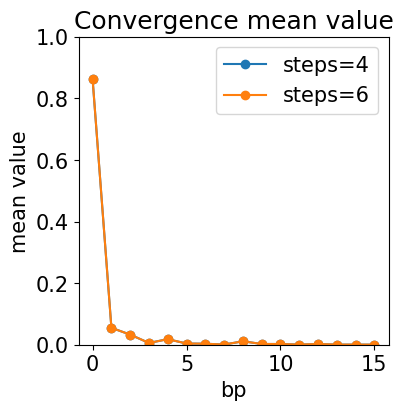

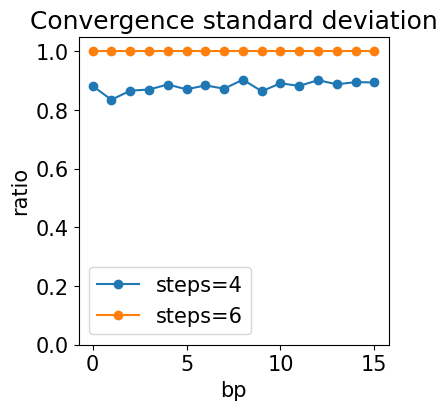

In [ ]:
def convergence_mean(steps_range,steps_saved,T,Delta):#for the mean 1 step is enough, no dependency in p
    fig, ax = plt.subplots(figsize=(4,4))
    name = 'probs_allbits_pq_p0=lD4_q0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
    probs_allbits_pq = np.load(path_data_sBs_probabilities+name)
    for steps in steps_range:
        probs_allbits_pq_step = probs_allbits_pq[::int(steps_saved/steps)]
        probs_bp = mean_probs_bp(probs_allbits_pq_step,T)
        ax.plot(probs_bp,'o-',label='steps={0:.0f}'.format(steps))
    ax.set_ylim(0,1)
    ax.set_title('Convergence mean value')
    ax.set_xlabel('bp')
    ax.set_ylabel('mean value')
    ax.legend()
    plt.show()
    return None

def convergence_stddev(steps_range, steps_saved, T, Delta):
    name = 'probs_allbits_pq_p0=lD4_q0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
    probs_allbits_pq = np.load(path_data_sBs_probabilities+name)    
    fig, ax = plt.subplots(figsize=(4,4))
    stddev_max = stddev_probs_bp(probs_allbits_pq,T)
    for steps in steps_range:#convergence is check for steps = 8. So, for extra safety we will go to 12 steps. 
        mean = mean_probs_bp(probs_allbits_pq[::int(steps_saved/steps)],T)
        stddev = stddev_probs_bp(probs_allbits_pq[::int(steps_saved/steps)],T)
        ratios = stddev_max/stddev
        ax.plot(ratios,'o-',label='steps={0:.0f}'.format(steps))
    ax.set_ylim(0,1.05)
    ax.set_title('Convergence standard deviation')
    ax.set_xlabel('bp')
    ax.set_ylabel('ratio')
    ax.legend()
    plt.show()
    return None

Delta = 0.3
T = 4
p0 = l/4
steps_saved = 16
steps_range = [4,6]
convergence_mean(steps_range,steps_saved,T,Delta)#converges at step 4
convergence_stddev(steps_range, steps_saved, T, Delta)#converged at step 6


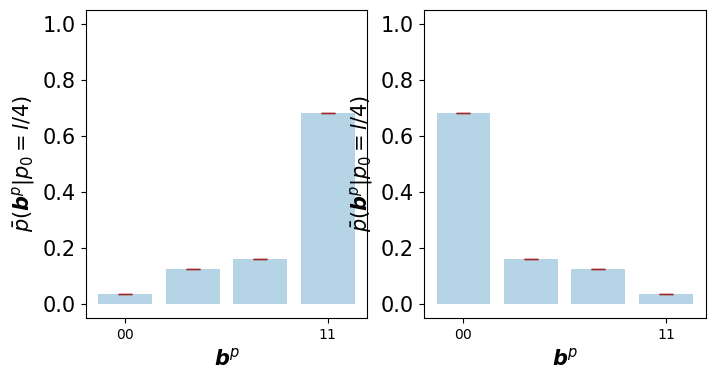

In [ ]:
#plotting mean and standard deviation for all bits up to T=5. 
steps_saved = 16
Delta = 0.3
T = 2
name = 'probs_allbits_pq_p0=lD8_q0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)
probs_allbits_pq = np.load(path_data_sBs_probabilities+name)    
mean = mean_probs_bp(probs_allbits_pq,T)
stddev = stddev_probs_bp(probs_allbits_pq,T)

name2 = 'probs_allbits_pq_q0=lD8_p0range(-lhalf,lhalf)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}.npy'.format(steps_saved,Delta,T)#D\equiv /, division
probs_allbits_pq2 = np.load(path_data_sBs_probabilities+name2)    
mean2 = mean_probs_bq(probs_allbits_pq2,T)
stddev2 = stddev_probs_bq(probs_allbits_pq2,T)

fig, axs = plt.subplots(1,2,figsize=(8,4))
ax, ax2 = axs
# Define the x values (bitstring indices)
x_values = np.arange(len(mean))
# Plot the mean probabilities with error bars representing the standard deviation
# plt.errorbar(x_values, mean, yerr=stddev, fmt='o', ecolor=red, capsize=5, label='Mean with Std Dev',markerfacecolor='none', markeredgecolor=blue)
ax.bar(x_values, mean, yerr=stddev, ecolor=red, capsize=5, label='Mean with Std Dev',color=light_blue,alpha=.6)

# Add labels and title
ax.set_xlabel(r'$\boldsymbol{b}^p$')
ax.set_ylabel(r'$\bar p(\boldsymbol{b}^p| p_0=l/4)$')
ax.set_ylim(-.05,1.05)
# ax.set_yticks([0,1])
xticks = [0,3]
xtickslabels = [r'$00$',r'$11$']
ax.set_xticks(xticks, xtickslabels,fontsize=10)

# Plot the mean probabilities with error bars representing the standard deviation
# plt.errorbar(x_values, mean, yerr=stddev, fmt='o', ecolor=red, capsize=5, label='Mean with Std Dev',markerfacecolor='none', markeredgecolor=blue)
ax2.bar(x_values, mean2, yerr=stddev, ecolor=red, capsize=5, label='Mean with Std Dev',color=light_blue,alpha=.6)

# Add labels and title
ax2.set_xlabel(r'$\boldsymbol{b}^p$')
ax2.set_ylabel(r'$\bar p(\boldsymbol{b}^p| p_0=l/4)$')
ax2.set_ylim(-.05,1.05)
# ax.set_yticks([0,1])
xticks = [0,3]
xtickslabels = [r'$00$',r'$11$']
ax2.set_xticks(xticks, xtickslabels,fontsize=10)

# Show the plot
plt.show()

# Variance of the probability of e/g at round T

In [ ]:
#use the same data as calculating the variance respect the opposite quadrature. 

# Probabilities in q0_range and p0_range for Bayesian inference

In [ ]:
# # getting the probabilities up to T=6
# Delta_range = [.25,.3,.35]
# R0 = 120
# T = 5
# steps_range = [60]
# q0 = 0#we fix p0 to 0 as we saw the dependency in p0 is depreciable
# for Delta in Delta_range:
#     name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#     sensor = sps.load_npz(path_data_sBs_sensor+name)
#     for steps in steps_range:
#         probs_allbits_pq = []
#         p0_range = (l*3/5)*np.linspace(-1.01,1.02,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
#         for p0 in tqdm(p0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T)
#             probs_allbits_pq.append(probs_b)
#         probs_allbits_pq = np.array(probs_allbits_pq)
#         name = 'probs_allbits_pq_q0=0_p0range(-l3over5,l3over5)_steps={0:.0f}_Delta={1:.2f}_T={2:.0f}'.format(steps,Delta,T)#D\equiv /, division
#         np.save(path_data_sBs_probabilities+name,probs_allbits_pq)

# Getting averaged map probabilities and stabilizers after displacement running R rounds of sBs

In [ ]:
# R0, R1 = 120, 50 #preparation, rounds
# q0_range = (l/4)*np.arange(-4.0,4.01,.05)
# p0_range = (l/16)*np.arange(0,17,1)
# Delta_range = [0.2,0.25,0.3,0.35,0.4]

# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     warnings.filterwarnings("ignore")
#     def get_probabilities(Delta):
#         cd = np.cosh(Delta**2)
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#         sensor = sps.csc_matrix(sps.load_npz(path_data_sBs_sensor+name))
#         Tq_delta, Tp_delta = stabilizers(Delta)
#         def get_probs_stabilizers_photons_q0(q0):
#             alpha = q0/np.sqrt(2)
#             Dalpha = Displacement(alpha)
#             rho = Dalpha@sensor@Dalpha.getH()
#             rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho)
#             Tq_delta_alpha, Tp_delta_alpha = displaced_stabilizers(Tq_delta,Tp_delta,q0)
#             stabilizers_q, stabilizers_p = [], []
#             photons = []
#             for rho in rhos:
#                 q0, p0 = (q_op@rho).diagonal().sum(), (p_op@rho).diagonal().sum()
#                 alpha = (q0 + 1j*p0)/np.sqrt(2)
#                 Tq_delta_alpha, Tp_delta_alpha = displaced_stabilizers(Tq_delta,Tp_delta,alpha)
#                 stabilizers_q.append((Tq_delta_alpha@rho).diagonal().sum())
#                 stabilizers_p.append((Tp_delta_alpha@rho).diagonal().sum())
#                 photons.append((n_op@rho).diagonal().sum())
#             return [probs_gq,probs_gp,stabilizers_q,stabilizers_p,photons]
#         list_stabilizers = Parallel(n_jobs=20)(delayed(get_probs_stabilizers_photons_q0)(q0) for q0 in q0_range)
#         probs_stabilizers_photons = np.array(list_stabilizers)
#         probs_array = probs_stabilizers_photons[:,:2]
#         stabilizers_array = probs_stabilizers_photons[:,2:]
#         photons_array = probs_stabilizers_photons[:,4]
#         name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}'.format(Delta,R1)
#         name_stabs = 'stabilizers_Delta={0:.2f}_R={1:.0f}'.format(Delta,R1)
#         name_photons = 'photons_Delta={0:.2f}_R={1:.0f}'.format(Delta,R1)
#         np.save(path_data_sBs_probabilities + name_probs,probs_array)
#         np.save(path_data_sBs_stabilizers + name_stabs,stabilizers_array)
#         np.save(path_data_sBs_photons + name_photons,photons_array)
#         return None

#     for Delta in tqdm(Delta_range):
#         get_probabilities(Delta)

# Averaged map simulations

### probabilties, stabilizer and photons of averaged map

In [ ]:
# def getting_probs_stabs_photons(Delta,R0,R1):
#     probs_q0p0 = []
#     stabilizers_q0p0 = []
#     photons_q0p0 = []
#     name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#     sensor = sps.csc_matrix(sps.load_npz(path_data_sBs_sensor+name))
#     for q0 in q0_range:
#         cd = np.cosh(Delta**2)
#         Tq_delta, Tp_delta = stabilizers(Delta)
#         def get_probs_stabilizers_photons_q0p0(q0,p0):
#             alpha = (q0+1j*p0)/np.sqrt(2)
#             Dalpha = Displacement(alpha)
#             rho = Dalpha@sensor@Dalpha.getH()
#             rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho)
#             Tq_delta_alpha, Tp_delta_alpha = displaced_stabilizers(Tq_delta,Tp_delta,q0)
#             stabilizers_q, stabilizers_p = [], []
#             photons = []
#             for rho in rhos:
#                 q_0, p_0 = (q_op@rho).diagonal().sum(), (p_op@rho).diagonal().sum()
#                 alpha = (q_0 + 1j*p_0)/np.sqrt(2)
#                 Tq_delta_alpha, Tp_delta_alpha = displaced_stabilizers(Tq_delta,Tp_delta,alpha)
#                 stabilizers_q.append((Tq_delta_alpha@rho).diagonal().sum())
#                 stabilizers_p.append((Tp_delta_alpha@rho).diagonal().sum())
#                 photons.append((n_op@rho).diagonal().sum())
#             return [probs_gq,probs_gp,stabilizers_q,stabilizers_p,photons]
#         probs_stabilizers_photons = Parallel(n_jobs=20)(delayed(get_probs_stabilizers_photons_q0p0)(q0,p0) for p0 in p0_range)
#         probs_stabilizers_photons = np.array(probs_stabilizers_photons)
#         probs_array = probs_stabilizers_photons[:,:2]
#         stabilizers_array = probs_stabilizers_photons[:,2:]
#         photons_array = probs_stabilizers_photons[:,4]
#         probs_q0p0.append(probs_array)
#         stabilizers_q0p0.append(stabilizers_array)
#         photons_q0p0.append(photons_array)
#     probs_array = np.array(probs_q0p0)#shape [q0][p0][q or p][round]
#     stabilizers_array = np.array(stabilizers_q0p0)
#     photons_array = np.array(photons_q0p0)
#     name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}'.format(Delta,R1,len(q0_range))
#     print(name_probs)
#     name_stabs = 'stabilizers_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}'.format(Delta,R1,len(q0_range))
#     name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}'.format(Delta,R1,len(q0_range))
#     np.save(path_data_sBs_probabilities + name_probs,probs_array)
#     np.save(path_data_sBs_stabilizers + name_stabs,stabilizers_array)
#     np.save(path_data_sBs_photons + name_photons,photons_array)

# R0, R1 = 120, 30 #preparation, rounds
# steps = [25]
# for step in steps:
#     q0_range = (l/2)*np.linspace(0,1.0,step)
#     # p0_range = (l/step)*np.arange(0,step+1,1)
#     p0_range = (l/8)*np.arange(0,9,1)
#     Delta_range = [0.25,0.3,0.35]

#     for Delta in tqdm(Delta_range):
#         getting_probs_stabs_photons(Delta,R0,R1)
# print('Done!')

### probabilities for metrological potential

In [ ]:
print(np.linspace(-1.0,1.0,201))

[-1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91 -0.9  -0.89
 -0.88 -0.87 -0.86 -0.85 -0.84 -0.83 -0.82 -0.81 -0.8  -0.79 -0.78 -0.77
 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69 -0.68 -0.67 -0.66 -0.65
 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55 -0.54 -0.53
 -0.52 -0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29
 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17
 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05
 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07
  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0

In [ ]:
def getting_probs(Delta,R0,R1,k,steps,gauges):
    cd = np.cosh(Delta**2)
    q0_range = (l/4/cd)*np.linspace(-1.0,1.0,steps)
    if k==0:
        p0 = 0
    else:
        p0 = l/k
    probs_q0p0 = []
    print(Delta)
    name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
    sensor = sps.csc_matrix(sps.load_npz(path_data_sBs_sensor+name))
    def get_probs_q0p0(q0,p0):
        alpha = (q0+1j*p0)/np.sqrt(2)
        Dalpha = Displacement(alpha)
        rho = Dalpha@sensor@Dalpha.getH()
        rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho,gauges)
        return [probs_gq,probs_gp]
    
    probs = Parallel(n_jobs=20)(delayed(get_probs_q0p0)(q0,p0) for q0 in q0_range)
    probs_array = np.array(probs)#shape [q0][q or p][round]
    name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}_p0=lover{2:.0f}_q0range(-lover4,lover4)_steps={3:.0f}'.format(Delta,R1,k,steps)
    print(name_probs)
    np.save(path_data_sBs_probabilities + name_probs,probs_array)
    return None


R0, R1 = 120, 15 #preparation, rounds
steps = 101
gauges = [0,0]
p0_range = [0]
Delta_range = [.25]
for k in p0_range:
    for Delta in tqdm(Delta_range):
        getting_probs(Delta,R0,R1,k,steps,gauges)
print('Done!')

  0%|          | 0/1 [00:00<?, ?it/s]

0.25


/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
/Users/labl2714/Projects/GKP-metrology/LL_env_1/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603

[[0.01246484 0.01719797 0.02594457 0.03833568 0.05389421 0.07207317
  0.09229413 0.11398203 0.13659347 0.15963721 0.18268705 0.20538754
  0.22745429 0.24866999 0.26887794]
 [0.49999917 0.49999917 0.49999917 0.49999917 0.49999917 0.49999917
  0.49999916 0.49999915 0.49999915 0.49999914 0.49999913 0.49999912
  0.49999912 0.49999911 0.4999991 ]]
probabilities_Delta=0.25_R=15_p0=lover0_q0range(-lover4,lover4)_steps=101
Done!


In [ ]:
# def getting_probs(Delta,R0,R1,k,steps,gauges):
#     cd = np.cosh(Delta**2)
#     p0_range = (l/4/cd)*np.linspace(-1.0,1.0,steps)
#     if k==0:
#         q0 = 0
#     else:
#         q0 = l/k
#     probs_q0p0 = []
#     print(Delta)
#     name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#     sensor = sps.csc_matrix(sps.load_npz(path_data_sBs_sensor+name))
#     def get_probs_q0p0(q0,p0):
#         alpha = (q0+1j*p0)/np.sqrt(2)
#         Dalpha = Displacement(alpha)
#         rho = Dalpha@sensor@Dalpha.getH()
#         rhos, probs_gq, probs_gp = sBs_cycle(Delta,R1,rho,gauges)
#         return [probs_gq,probs_gp]
    
#     probs = Parallel(n_jobs=20)(delayed(get_probs_q0p0)(q0,p0) for p0 in p0_range)
#     probs_array = np.array(probs)#shape [q0][q or p][round]
#     name_probs = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0=lover{2:.0f}_p0range(-lover4,lover4)_steps={3:.0f}'.format(Delta,R1,k,steps)
#     print(name_probs)
#     np.save(path_data_sBs_probabilities + name_probs,probs_array)
#     return None

# R0, R1 = 120, 15 #preparation, rounds
# steps = 101
# gauges = [0,0]
# q0_range = [0,2,4]
# Delta_range = [.25,0.3,.35]
# for k in p0_range:
#     for Delta in tqdm(Delta_range):
#         getting_probs(Delta,R0,R1,k,steps,gauges)
# print('Done!')

# Full map simulations

In [ ]:
# # getting the probabilities up to T=7, but for a single p0
# R0, T = 120, 4 #preparation, rounds
# steps = 101
# gauges = [0,0]
# p0_range = [0,2,4]
# Delta_range = [0.25,.3,.35]
# q0_range = (l/4)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
# for k in p0_range:
#     if k==0:
#         p0 = 0
#     else:
#         p0 = l/k
#     for Delta in Delta_range:
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#         sensor = sps.load_npz(path_data_sBs_sensor+name)
#         probs_allbits_p0q = []
#         for q0 in tqdm(q0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_p0q.append(probs_b)
#         probs_allbits_p0q = np.array(probs_allbits_p0q)
#         name = 'probs_allbits_p0=lover{0:.0f}_qrange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
#         np.save(path_data_sBs_probabilities+name,probs_allbits_p0q)

100%|██████████| 101/101 [02:53<00:00,  1.72s/it]


In [ ]:
# np.linspace(-1.5,1.5,101)

In [ ]:
# # getting the probabilities up to T=7, but for a single p0
# R0, T = 120, 4 #preparation, rounds
# steps = 101
# p0_range = [0,2,4]
# Delta_range = [0.25,.3,.35]
# q0_range = (3*l/2)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
# for k in p0_range:
#     if k==0:
#         p0 = 0
#     else:
#         p0 = l/k
#     for Delta in Delta_range:
#         name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
#         sensor = sps.load_npz(path_data_sBs_sensor+name)
#         probs_allbits_p0q = []
#         for q0 in tqdm(q0_range):
#             probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
#             probs_allbits_p0q.append(probs_b)
#         probs_allbits_p0q = np.array(probs_allbits_p0q)
#         name = 'probs_allbits_p0=lover{0:.2f}_qrange(-3lover2,3lover2)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
#         np.save(path_data_sBs_probabilities+name,probs_allbits_p0q)

  0%|          | 0/101 [00:00<?, ?it/s]


TypeError: sBs_allbits() missing 1 required positional argument: 'gauges'

In [5]:
# getting the probabilities up to T=4, but for a single p0, range -l to l for gaussian priors
R0, T = 120, 4 #preparation, rounds
steps = 51
gauges = [0,0]
# p0_range = [0,2,4]
q0_range = [0]
Delta_range = [0.25,.3,.35]
# q0_range = (l)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
p0_range = (l)*np.linspace(-1.0,1.0,steps)
for k in q0_range:
    if k==0:
        q0 = 0
    else:
        q0 = l/k
    for Delta in Delta_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_sBs_sensor+name)
        probs_allbits_p0q = []
        for p0 in tqdm(p0_range):
            probs_b = sBs_allbits(Delta,q0,p0,sensor,T,gauges)
            probs_allbits_p0q.append(probs_b)
        probs_allbits_p0q = np.array(probs_allbits_p0q)
        # name = 'probs_allbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        name = 'probs_allbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        np.save(path_data_sBs_probabilities+name,probs_allbits_p0q)

100%|██████████| 51/51 [01:25<00:00,  1.68s/it]


In [3]:
Delta_range = [0.25,.3,.35]
k, T = 0, 4
steps = 101
for Delta in Delta_range:
    name = 'probs_allbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
    probs_allbits_p0q = np.load(path_data_sBs_probabilities+name+'.npy')


# Running full q-p bits

In [5]:
# getting the probabilities up to T=7, but for a single p0
R0, T = 120, 2 #preparation, rounds
steps = 101
gauges = [0,0]
Delta = 0.45
q0, p0 = -l/4, 0
name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
sensor = sps.load_npz(path_data_sBs_sensor+name)
probs_qbits = sBs_allqbits(Delta,q0,p0,sensor,T,gauges)
print(probs_qbits)


[0.01820958 0.02535166 0.07095309 0.88548556]


### q bits

In [10]:
# getting the probabilities up to T=7, but for a single p0, l/4
R0, T = 120, 10 #preparation, rounds
steps = 201
gauges = [0,0]
p0_range = [0]
Delta_range = np.arange(0.25,0.41,.01)
Delta_range = [0.3]
q0_range = (l)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
for k in p0_range:
    if k==0:
        p0 = 0
    else:
        p0 = l/k
    for Delta in Delta_range:
        print(Delta)
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_sBs_sensor+name)
        # probs_qbits_p0q = Parallel(n_jobs=20)(delayed(sBs_allqbits)(Delta,q0,p0,sensor,T,gauges) for q0 in tqdm(q0_range))
        probs_qbits_p0q = []
        for q0 in tqdm(q0_range):
            probs_b = sBs_allqbits(Delta,q0,p0,sensor,T,gauges)
            probs_qbits_p0q.append(probs_b)
        probs_qbits_p0q = np.array(probs_qbits_p0q)
        # name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division

        print(name)
        np.save(path_data_sBs_probabilities+name,probs_qbits_p0q)

0.3


  0%|          | 0/201 [00:00<?, ?it/s]

100%|██████████| 201/201 [57:07<00:00, 17.05s/it]

probs_allqbits_p0=lover0_qrange(-l,l)_steps=201_Delta=0.30_T=10


In [20]:
Delta = 0.4
name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}.npy'.format(k,steps,Delta,T)#D\equiv /, division
np.load(path_data_sBs_probabilities+name)

array([[1.59345169e-03, 2.12293456e-04, 1.14068751e-04, ...,
        4.54214995e-02, 5.47123782e-02, 1.09254448e-01],
       [1.17195585e-03, 1.52534766e-04, 8.14783976e-05, ...,
        4.26139273e-02, 5.09748965e-02, 9.93506350e-02],
       [8.51807213e-04, 1.08748861e-04, 5.79369139e-05, ...,
        3.97045375e-02, 4.71654861e-02, 8.97076006e-02],
       ...,
       [8.97076006e-02, 4.71654861e-02, 3.97045375e-02, ...,
        5.79369139e-05, 1.08748861e-04, 8.51807213e-04],
       [9.93506350e-02, 5.09748965e-02, 4.26139273e-02, ...,
        8.14783976e-05, 1.52534766e-04, 1.17195585e-03],
       [1.09254448e-01, 5.47123782e-02, 4.54214995e-02, ...,
        1.14068751e-04, 2.12293456e-04, 1.59345169e-03]])

### p bits

In [6]:
# getting the probabilities up to T=10, but for a single q0,l
R0, T = 120, 10 #preparation, rounds
steps = 51
gauges = [0,0]
q0_range = [0]
Delta_range = [.25,.3,.35,.4]
p0_range = (l)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
for k in q0_range:
    if k==0:
        q0 = 0
    else:
        q0 = l/k
    for Delta in Delta_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_sBs_sensor+name)
        # probs_qbits_p0q = Parallel(n_jobs=20)(delayed(sBs_allqbits)(Delta,q0,p0,sensor,T,gauges) for q0 in tqdm(q0_range))
        probs_qbits_p0q = []
        for p0 in tqdm(p0_range):
            probs_b = sBs_allpbits(Delta,q0,p0,sensor,T,gauges)
            probs_qbits_p0q.append(probs_b)
        probs_qbits_p0q = np.array(probs_qbits_p0q)
        name = 'probs_allpbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        print(name)
        np.save(path_data_sBs_probabilities+name,probs_qbits_p0q)

100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.25_T=10


100%|██████████| 51/51 [17:03<00:00, 20.08s/it]


probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.30_T=10


100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.35_T=10


100%|██████████| 51/51 [17:03<00:00, 20.07s/it]

probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.40_T=10


In [ ]:
# getting the probabilities up to T=10, but for a single q0,l
R0, T = 120, 10 #preparation, rounds
steps = 51
gauges = [0,0]
q0_range = [0]
Delta_range = np.arange(0.25,0.41,.01)
p0_range = (l/4)*np.linspace(-1.0,1.0,steps)#this interval is chosen to have 99% of the density inside the interval (-l5/16,l5/16)
for k in q0_range:
    if k==0:
        q0 = 0
    else:
        q0 = l/k
    for Delta in Delta_range:
        name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
        sensor = sps.load_npz(path_data_sBs_sensor+name)
        # probs_qbits_p0q = Parallel(n_jobs=20)(delayed(sBs_allqbits)(Delta,q0,p0,sensor,T,gauges) for q0 in tqdm(q0_range))
        probs_qbits_p0q = []
        for p0 in tqdm(p0_range):
            probs_b = sBs_allpbits(Delta,q0,p0,sensor,T,gauges)
            probs_qbits_p0q.append(probs_b)
        probs_qbits_p0q = np.array(probs_qbits_p0q)
        name = 'probs_allpbits_q0=lover{0:.0f}_prange(-lover4,lover4)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,T)#D\equiv /, division
        print(name)
        np.save(path_data_sBs_probabilities+name,probs_qbits_p0q)

100%|██████████| 51/51 [17:06<00:00, 20.12s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.25_T=10


100%|██████████| 51/51 [17:03<00:00, 20.07s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.26_T=10


100%|██████████| 51/51 [17:00<00:00, 20.01s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.27_T=10


100%|██████████| 51/51 [17:02<00:00, 20.05s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.28_T=10


100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.29_T=10


100%|██████████| 51/51 [17:05<00:00, 20.10s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.30_T=10


100%|██████████| 51/51 [17:01<00:00, 20.03s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.31_T=10


100%|██████████| 51/51 [17:03<00:00, 20.07s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.32_T=10


100%|██████████| 51/51 [17:02<00:00, 20.05s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.33_T=10


100%|██████████| 51/51 [16:59<00:00, 19.99s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.34_T=10


100%|██████████| 51/51 [17:07<00:00, 20.15s/it]


probs_allpbits_q0=lover0_prange(-lover4,lover4)_steps=51_Delta=0.35_T=10


 98%|█████████▊| 50/51 [16:42<00:19, 19.95s/it]

In [5]:
k, T = 0, 10
steps = 51
Delta_range = np.arange(0.25,0.41,.01)
for Delta in Delta_range:
    name = 'probs_allpbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}.npy'.format(k,steps,Delta,T)#D\equiv /, division
    np.load(path_data_sBs_probabilities+name)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/labl2714/Projects/GKP-metrology/GKP-metrology/sBs-noiseless/sBs/probabilities/probs_allpbits_q0=lover0_prange(-l,l)_steps=51_Delta=0.31_T=10.npy'

# Plotting

### plotting probabilities and photon number after $q_0\leq l/4$ displacement

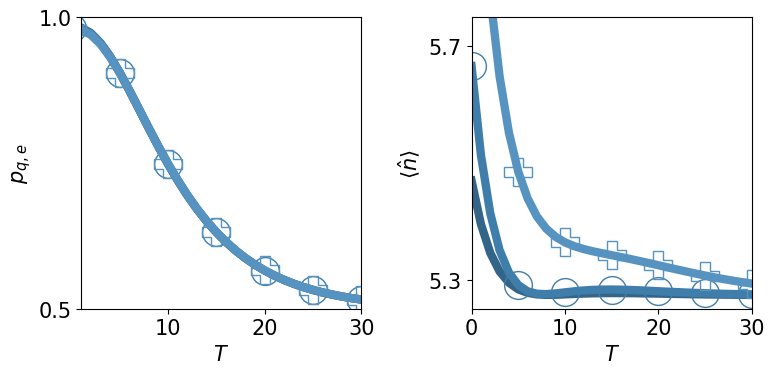

In [ ]:
R0, R1 = 120,30
steps = 25
q0_range = (l/2)*np.linspace(0,1.0,steps)
p0_range = (l/8)*np.arange(0,9,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, axs = plt.subplots(1,2,figsize=(8,4))
ax1, ax2 = axs
Delta_range = [0.3]
for Delta in Delta_range:
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))
    name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_sBs_probabilities+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    data_n = np.load(path_data_sBs_photons+name_photons,allow_pickle=True)
    j = int(steps/2)
    markers = {0:'none',2:'o',4:'P'}
    labels = {0:r'$p_0=0$',2:r'$p_0=l/8$',4:r'$p_0=l/4$'}

    for k in [0,2,4]:
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        photons = data_n[j][k]
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax.plot(R_range,probs_q0_p0_p,color=lighten_color(red,.2+.1*k),ls='-',lw=6)
        ax1.plot(R_range,probs_q0_p0_q,color=lighten_color(blue,1-.07*k),ls='-',lw=6,marker=markers[k],markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5,label=labels[k])
        ax2.plot(R_range,photons,color=lighten_color(blue,1-.07*k),ls='-',lw=6,marker=markers[k],markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5,label=labels[k])
        ax1.set_ylim(.5,1)
        ax1.set_xlim(1,R1)
        ax2.set_xlim(0,R1)
        ax2.set_ylim(5.25,5.75)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_yticks([.5,1])
ax2.set_yticks([5.3,5.7])
ax1.set_xlabel(r'$T$',fontsize=15)
ax1.set_ylabel(r'$p_{q,e}$',fontsize=15)
ax2.set_xlabel(r'$T$',fontsize=15)
ax2.set_ylabel(r'$\langle \hat n\rangle$',fontsize=15)
# ax1.legend(loc='upper right',fontsize=15)
plt.tight_layout()
plt.savefig(path_figures+'Paper-fig2.pdf',dpi=600)
plt.show()


[1.25348412] [[0.00028993]]
[1.24856436] [[0.00035879]]
[1.23606897] [[0.00037877]]


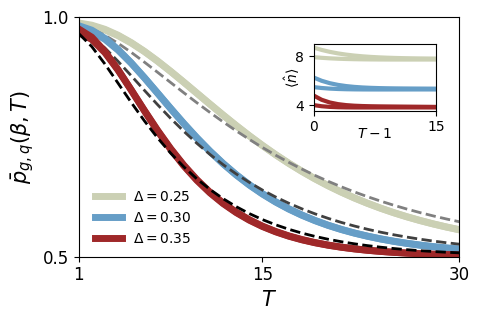

In [8]:
R0, R1 = 120,30
steps = 25
q0_range = (l/2)*np.linspace(0,1.0,steps)
p0_range = (l/8)*np.arange(0,9,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, ax = plt.subplots(figsize=(4.9,3.3))
inset_ax = fig.add_axes([0.65, 0.65, 0.25, 0.2])  # [left, bottom, width, height]
Delta_range = [.25,0.3,.35]
for i in range(3):
    Delta = Delta_range[i]
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))
    name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_sBs_probabilities+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    data_n = np.load(path_data_sBs_photons+name_photons,allow_pickle=True)
    j = int(steps/2)
    q0 = q0_range[j]
    markers = {0:'none',2:'none',4:'none'}
    colors = {0:lighten_color(green,.5),1:lighten_color(blue,.65),2:lighten_color(red,1)}
    for k in [0,4]:
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        photons = data_n[j][k]
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax1.plot(R_range,probs_q0_p0_p,color=red,ls='-',lw=6)
        if k==0:
            ax.plot(R_range,probs_q0_p0_q,color=colors[i],ls='-',lw=5,label=r'$\Delta = {0:.2f}$'.format(Delta))
        else:
            ax.plot(R_range,probs_q0_p0_q,color=colors[i],ls='-',lw=5)
        inset_ax.plot(R_range,photons,color=colors[i],ls='-',lw=3)
        ax.set_ylim(.5,1)
        ax.set_xlim(1,R1)
        inset_ax.set_xlim(0,14)
        # inset_ax.set_ylim(5.25,5.75)
    def probability_function(T,b):
        a = 0.4
        return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0*np.exp(-b*Delta**2*T)))/2
    popt, pcov = curve_fit(probability_function, R_range, probs_q0_p0_q)
    print(popt,pcov)
    ax.plot(R_range,probability_function(R_range,*popt),ls='--',lw=2,color=lighten_color('black',.5+.25*i))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']  # or ['STIXGeneral']


ax.tick_params(axis='both', which='major', labelsize=12)
inset_ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_yticks([.5,1])
inset_ax.set_yticks([8,4])
ax.set_xlabel(r'$T$',fontsize=15)
ax.set_ylabel(r'$\bar p_{g,q}(\beta, T)$',fontsize=15)
inset_ax.set_xlabel(r'$T-1$',fontsize=10,labelpad=-5)
inset_ax.set_ylabel(r'$\langle \hat n\rangle$',fontsize=10,labelpad=-5)
inset_ax.set_xticks([0,15])
ax.set_xticks([1,15,30])
ax.legend(fontsize=10,frameon=False,bbox_to_anchor=(.33,.33))
plt.tight_layout()
plt.savefig(path_figures+'Paper-fig2.pdf',bbox_inches='tight',dpi=600)
plt.show()


### fitting b, Figures 2 and 7

[1.25056272] [[0.00037767]]
[1.25046413] [[0.00037724]]
[1.25013983] [[0.00037554]]


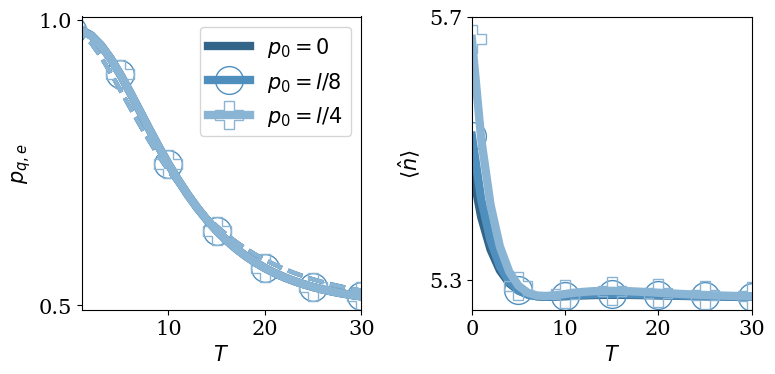

In [ ]:
#findind the fitting function 
R0, R1 = 120,30
steps = 32
q0_range = (l/steps)*np.arange(0,steps+1,1)
p0_range = (l/steps)*np.arange(0,steps+1,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, axs = plt.subplots(1,2,figsize=(8,4))
ax1, ax2 = axs
Delta_range = [0.3]
for Delta in Delta_range:
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))
    name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_sBs_probabilities+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    data_n = np.load(path_data_sBs_photons+name_photons,allow_pickle=True)
    j = int(steps/4)
    q0 = q0_range[j]
    markers = {0:'none',1:'o',2:'P'}
    labels = {0:r'$p_0=0$',1:r'$p_0=l/8$',2:r'$p_0=l/4$'}

    for k in [0,1,2]:
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        a = 0.4
        cd = np.cosh(Delta**2)
        photons = data_n[j][k]
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax1.plot(R_range,probs_q0_p0_p,color=lighten_color(red,1-.07*k),ls='-',lw=6)
        ax1.plot(R_range,1-probs_q0_p0_q,color=lighten_color(blue,1-.25*k),ls='-',lw=6,marker=markers[k],markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5,label=labels[k])
        ax2.plot(R_range,photons,color=lighten_color(blue,1-.25*k),ls='-',lw=6,marker=markers[k],markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5,label=labels[k])
        
        def probability_function(T,b):
            return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0*np.exp(-b*Delta**2*T)))/2
        popt, pcov = curve_fit(probability_function, R_range, 1-probs_q0_p0_q)
        ax1.plot(R_range,probability_function(R_range,*popt),ls='--',lw=3,color=lighten_color(blue,1-.25*k))
        print(popt,pcov)
        # ax1.set_ylim(0.5,1)
        ax1.set_xlim(1,R1)
        ax2.set_xlim(0,R1)
        # ax2.set_ylim(5.25,5.75)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_yticks([.5,1])
ax2.set_yticks([5.3,5.7])
ax1.set_xlabel(r'$T$',fontsize=15)
ax1.set_ylabel(r'$p_{q,e}$',fontsize=15)
ax2.set_xlabel(r'$T$',fontsize=15)
ax2.set_ylabel(r'$\langle \hat n\rangle$',fontsize=15)
ax1.legend(loc='upper right',fontsize=15)
plt.tight_layout()
plt.savefig(path_figures+'Paper-fig2.pdf',dpi=600)
plt.show()


NameError: name 'a' is not defined

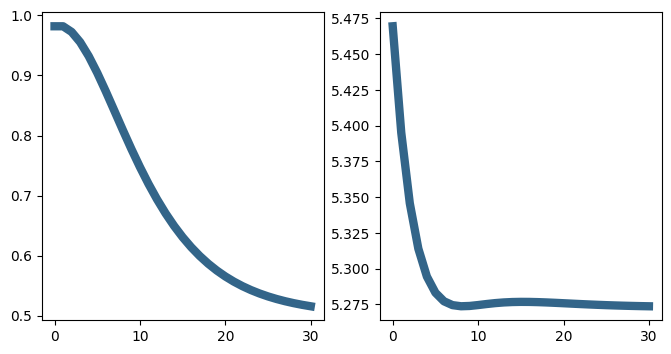

In [4]:
# improving the fit
R0, R1 = 120,30
steps = 32
q0_range = (l/steps)*np.arange(0,steps+1,1)
p0_range = (l/steps)*np.arange(0,steps+1,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, axs = plt.subplots(1,2,figsize=(8,4))
ax1, ax2 = axs
Delta_range = [0.3]
for Delta in Delta_range:
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))
    name_photons = 'photons_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_sBs_probabilities+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    data_n = np.load(path_data_sBs_photons+name_photons,allow_pickle=True)
    j = int(steps/4)
    q0 = q0_range[j]
    markers = {0:'none',1:'o',2:'P'}
    labels = {0:r'$p_0=0$',1:r'$p_0=l/8$',2:r'$p_0=l/4$'}

    for k in [0,1,2]:
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        cd = np.cosh(Delta**2)
        photons = data_n[j][k]
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax1.plot(R_range,probs_q0_p0_p,color=lighten_color(red,1-.07*k),ls='-',lw=6)
        ax1.plot(R_range,1-probs_q0_p0_q,color=lighten_color(blue,1-.25*k),ls='-',lw=6,marker=markers[k],markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5,label=labels[k])
        ax2.plot(R_range,photons,color=lighten_color(blue,1-.25*k),ls='-',lw=6,marker=markers[k],markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5,label=labels[k])

        def probability_function(T,b):
            return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0*np.exp(-b*Delta**2*T)))/2
        popt, pcov = curve_fit(probability_function, R_range, 1-probs_q0_p0_q)
        ax1.plot(R_range,probability_function(R_range,*popt),ls='--',lw=3,color=lighten_color(blue,1-.25*k))

        def better_fit(T,b,c):
            a = 0.4
            qt = q0*np.exp(-b*Delta**2*T)
            rate2 = b+c*np.abs(np.sin(l*qt))
            qt = q0*np.exp(-rate2*Delta**2*T)
            return (1+np.exp(-a*Delta**2)*np.sin(l*cd*qt))/2
        popt, pcov = curve_fit(better_fit, R_range, 1-probs_q0_p0_q,p0=[1,1])
        print(popt,pcov)
        ax1.plot(R_range,better_fit(R_range,*popt),ls='--',lw=3,color=lighten_color(red,1-.25*k))

        # ax1.set_ylim(0.5,1)
        ax1.set_xlim(1,R1)
        ax2.set_xlim(0,R1)
        # ax2.set_ylim(5.25,5.75)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_yticks([.5,1])
ax2.set_yticks([5.3,5.7])
ax1.set_xlabel(r'$T$',fontsize=15)
ax1.set_ylabel(r'$p_{q,e}$',fontsize=15)
ax2.set_xlabel(r'$T$',fontsize=15)
ax2.set_ylabel(r'$\langle \hat n\rangle$',fontsize=15)
ax1.legend(loc='upper right',fontsize=15)
plt.tight_layout()
plt.savefig(path_figures+'Paper-fig2.pdf',dpi=600)
plt.show()

b,c 1.451002426881533 -0.43403119690429653
b,c 1.435835672174344 -0.43960669463564417
b,c 1.4265017353978573 -0.43931305436276064


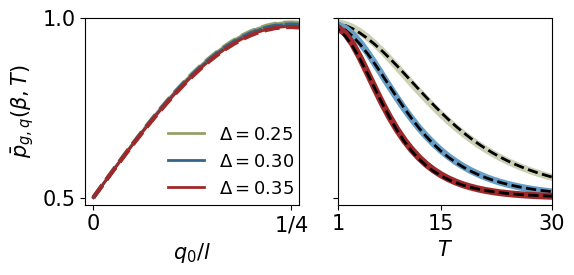

In [5]:
# plotting both the probabilities of the single round as function of q0, and the probabilites of several rounds with improved function
# improving the fit
R0, R1 = 120,30
steps = 32
q0_range = (l/steps)*np.arange(0,steps+1,1)
p0_range = (l/steps)*np.arange(0,steps+1,1)
fit_params = []
R_range = np.arange(0,R1+1,1)

fig, axs = plt.subplots(1,2,figsize=(6,3),sharey=True)
ax1, ax2 = axs
Delta_range = [.25,0.3,.35]
colors = [lighten_color(green,.5),lighten_color(blue,.65),lighten_color(red,1)]
for i in range(3):
    Delta = Delta_range[i]
    name = 'probabilities_Delta={0:.2f}_R={1:.0f}_q0_steps={2:.0f}.npy'.format(Delta,R1,len(q0_range))

    data = np.real(np.load(path_data_sBs_probabilities+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
    j = int(steps/4)
    q0 = q0_range[j]
    markers = {0:'none',1:'o',2:'P'}
    labels = {0:r'$p_0=0$',1:r'$p_0=l/8$',2:r'$q_0=p_0=l/4$'}

    for k in [2]:#you can try any other value of p_0, up to l/4 the fits remain nearly the same
        probs_q0_p0_q = data[j][k][0]
        probs_q0_p0_p = data[j][k][1]
        cd = np.cosh(Delta**2)
        photons = data_n[j][k]
        sd, cd, td = np.sinh(Delta**2), np.cosh(Delta**2), np.tanh(Delta**2)
        # ax1.plot(R_range,probs_q0_p0_p,color=lighten_color(red,1-.07*k),ls='-',lw=6)
        ax2.plot(R_range,1-probs_q0_p0_q,color=colors[i],ls='-',lw=5,marker='None',markersize=20,markerfacecolor='none',markeredgewidth=1,markevery=5)

        def update_function(params): #this would be actual function written in the main, it also works, it was just harder to write a fit code as curve_fit doesn't take it.
            a = 0.4
            b, c = params
            q_list = [q0]
            p_list = [(1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2]
            for T in np.arange(1,R1+1,1):
                qt = q_list[T-1].copy()
                rate2 = b+c*np.abs(np.sin(l*qt))
                qt = q0*np.exp(-rate2*Delta**2*T)
                q_list.append(qt)
                pgt = (1+np.exp(-a*Delta**2)*np.sin(l*cd*qt))/2
                p_list.append(pgt)
            return np.linalg.norm(np.array(p_list)-(1-np.array(probs_q0_p0_q)))

        from scipy.optimize import minimize
        initial_guess = [1.42,-.55]
        result = minimize(update_function, initial_guess, method='Nelder-Mead', tol=1e-6)
        b,c = result.x
        print('b,c',b,c)
        b, c = 1.44,-.44
        
        def improved_fit(params): #this would be actual function written in the main, it also works, it was just harder to write a fit code as curve_fit doesn't take it.
            a = 0.4
            b, c = params
            q_list = [q0]
            p_list = [(1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2]
            for T in np.arange(1,R1+1,1):
                qt = q_list[T-1].copy()
                rate2 = b+c*np.abs(np.sin(l*qt))
                qt = q0*np.exp(-rate2*Delta**2*T)
                q_list.append(qt)
                pgt = (1+np.exp(-a*Delta**2)*np.sin(l*cd*qt))/2
                p_list.append(pgt)
            return np.array(p_list)
        ax2.plot(R_range,improved_fit([b,c]),ls='--',lw=2,color='black')

        # ax1.set_ylim(0.5,1)
        ax2.set_xlim(1,R1)

#appendix plot
name = 'probabilities_q_single_subround_q0_range(0,lhalf,48)_delta(25,30,35).npy'
probs_q = np.load(path_data_sBs_probabilities+name)
a = 0.4
Delta_range = [.25,.3,.35]
steps = 48
q0_range = (l/2/steps)*np.arange(0,steps+1,1)
colors = [green,blue,red]
for i in range(len(Delta_range)):
    Delta = Delta_range[i]
    cd = np.cosh(Delta**2)
    def probability_function(q0,a):
        return (1+np.exp(-a*Delta**2)*np.sin(l*cd*q0))/2
    ax1.plot(q0_range/l,probability_function(q0_range,a),'-',label=r'$\Delta={0:.2f}$'.format(Delta),lw=2,color=colors[i])

plt.rcParams.update({'font.size': 15})
ax1.plot(q0_range/l,1-probs_q[0],ls='--',lw=3,color=colors[0],alpha=1)
ax1.plot(q0_range/l,1-probs_q[1],ls='--',lw=3,color=colors[1],alpha=1)
ax1.plot(q0_range/l,1-probs_q[-1],ls='--',lw=3,color=colors[2],alpha=1)

plt.subplots_adjust(wspace=0.2)  # Adjust the value as needed

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_yticks([.5,1])
ax1.set_xticks([0,.25])
ax2.set_xticks([1,15,30])
ax1.legend(loc='lower right',frameon=False,fontsize=13,bbox_to_anchor=(1.05,-.05))
# ax2.legend(loc='upper right')
ax1.set_xticklabels([r'$0$',r'$1/4$'])
ax1.set_xlim(-.01,.26)
ax1.set_ylim(.48,1.0)
ax1.set_xlabel(r'$q_0/l$',fontsize=15)
ax1.set_ylabel(r'$\bar p_{g,q}(\beta,T)$',fontsize=15)
ax2.set_xlabel(r'$T$',fontsize=15)
plt.tight_layout()
plt.savefig(path_figures+'appendix-sBs-p(q0)-p(T).pdf',dpi=600)
plt.show()

## probabilities and stabilizers after displacement $q_0>l/4$

In [ ]:
# # plotting the evolution and the stabilizers
# fig, axs = plt.subplots(2,4,figsize=(16,8),sharey='row',sharex='col')
# plt.subplots_adjust(wspace=0.05, hspace=0.05)
# Delta_range = [0.2,0.25,0.3,0.35]
# q0_range = (l/4)*np.arange(-2.0,2.01,.05)
# q0_range_i = [0,10,20,30]
# axs1 = axs[0]
# axs2 = axs[1]

# for k in range(4):
#     j = q0_range_i[k]
#     ax1 = axs1[k]
#     ax2 = axs2[k]
#     if k==0:
#         ax1.set_ylabel(r'$p_g$',fontsize=15)
#         ax2.set_ylabel(r'$|\langle T \rangle|$',fontsize=15)
#     for i in range(len(Delta_range)):
#         Delta = Delta_range[i]
#         name = 'probabilities_Delta={0:.2f}_R={1:.0f}.npy'.format(Delta,R1)
#         data = np.real(np.load(path_data_sBs_probabilities+name,allow_pickle=True))# data[a][b], a is index in the q0_range, b is 0 for q, 1 for p
#         probs_q = data[j][0]

#         name_stabs = 'stabilizers_Delta={0:.2f}_R={1:.0f}.npy'.format(Delta,R1)
#         data_stabs = np.load(path_data_sBs_stabilizers+name_stabs,allow_pickle=True)
#         stabilizers_q = np.abs(data_stabs[j][0])
#         stabilizers_p = np.abs(data_stabs[j][1])

#         ax1.scatter(range(R1+1),probs_q,label=r'$\Delta = {0:.2f}$'.format(Delta),color=lighten_color(red,1-2*Delta),lw=1)
#         ax2.scatter(range(R1+1),stabilizers_q,label=r'$\Delta = {0:.2f}$'.format(Delta),color=lighten_color(blue,1-2*Delta),lw=3)
#         ax2.scatter(range(R1+1),stabilizers_p,label=r'$\Delta = {0:.2f}$'.format(Delta),color=lighten_color(green,1-2*Delta),lw=3)
#         ax2.plot(range(R1+1),stabilizers_q,label=r'$\Delta = {0:.2f}$'.format(Delta),color=lighten_color(blue,1-2*Delta),lw=2)
#         ax2.plot(range(R1+1),stabilizers_p,label=r'$\Delta = {0:.2f}$'.format(Delta),color=lighten_color(green,1-2*Delta),lw=2)

#         # Set tick label size
#         ax1.tick_params(axis='both', which='major', labelsize=12)
#         ax2.tick_params(axis='both', which='major', labelsize=12)
#         # Set y-axis ticks
#         ax1.set_yticks([0.5, 0.75, 1])
#         ax2.set_yticks([0, 0.25, 0.5, 0.75, 1])
#     # Add text box with the value of q0 in each plot of the first row
#     dict_labels = {'0':r'$q_0=-l/2$','1':r'$q_0=-3l/8$','2':r'$q_0=-l/4$','3':r'$q_0=-l/8$'}
#     q0_value = q0_range[j]
#     ax1.text(0.6, 0.95,dict_labels[str(k)], transform=ax1.transAxes, fontsize=12,
#             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
#     ax1.set_ylim(0.49,1)
#     ax2.set_ylim(-0.05,1.05)

# plt.tight_layout()
# name = 'sBs-probs-stabilizers.pdf'
# plt.savefig(path_figures + name,bbox_inches='tight',dpi=1000)

# Visualizing the wigner function evolution

In [ ]:
#create the wigners and store them
Delta, R = 0.3, 120
name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R)
sensor = sps.load_npz(path_data_sBs_sensor+name)

q0_range = (l/16)*np.arange(0,17,1)
Rtest = 20

# for q0 in tqdm(q0_range):
#     D_alpha = Displacement(q0/np.sqrt(2))
#     rho = D_alpha@sensor@D_alpha.getH()
#     rhos, probs_gq, probs_gp = sBs_cycle(Delta,Rtest,rho)
#     wigners = []
#     for i in range(Rtest):
#         rho = rhos[i]
#         if i%2 == 0:
#             rho = qt.Qobj(rho)
#             W = qt.wigner(rho, xvec, xvec)
#             wigners.append(W)
#         else:
#             pass
#     # Save the list of arrays to a file
#     name = 'wigners_lq0={0:.3f}_Delta={1:.2f}_R={2:.0f}.npz'.format(q0/l,Delta,Rtest)
#     np.savez(path_data_wigners+name,*wigners)

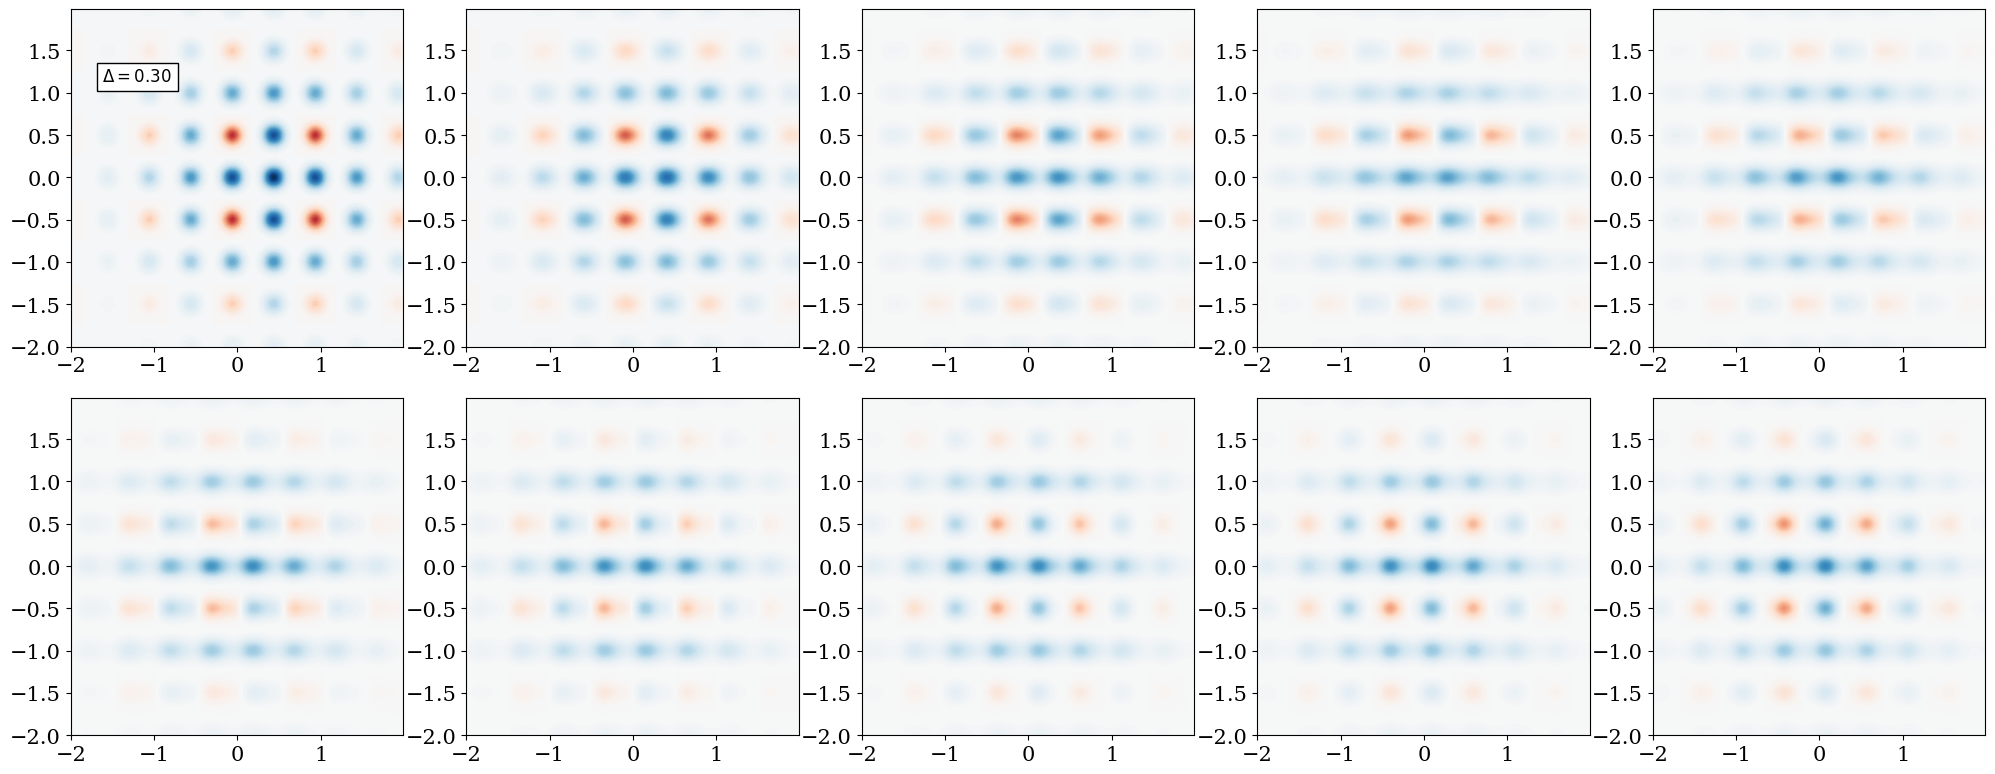

In [ ]:
q0 = (7/16)*l
Delta, R = 0.3, 20
name = 'wigners_lq0={0:.3f}_Delta={1:.2f}_R={2:.0f}.npz'.format(q0/l,Delta,Rtest)
loaded = np.load(path_data_wigners+name)
wigners = [loaded[key] for key in loaded]
fig, axs = plt.subplots(2,5,figsize=(20,8))
for i in range(2):
    for j in range(5):
        axs[i,j].contourf(xvec/l, xvec/l, wigners[5*i+j], 100, cmap=cm.RdBu, norm=nrm)

# Add a textbox on the first plot with the value of Delta
axs[0,0].text(0.2, 0.8, r'$\Delta = {0:.2f}$'.format(Delta), transform=axs[0,0].transAxes, fontsize=12,
              verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=1))

plt.tight_layout()
name = 'sBs-wigners-q0-greater-lhalf'
plt.savefig(path_figures + name + '.pdf',bbox_inches='tight')

# Simple test of probabilities, gauges

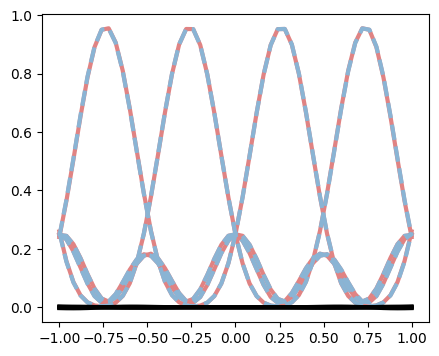

In [6]:
k, steps, R = 0,51,2
Delta_range = [.3]
T = 2
x_range = np.linspace(-l,l,steps)

for Delta in Delta_range:

    cd = np.cosh(Delta**2)
    q0_range = (l)*np.linspace(-1.0,1.0,steps)
    name = 'probs_allqbits_p0=lover{0:.0f}_qrange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,R)#D\equiv /, division
    probs_qp0_allbits = np.load(path_data_sBs_probabilities+name+'.npy',allow_pickle=True)
    name2 = 'probs_allpbits_q0=lover{0:.0f}_prange(-l,l)_steps={1:.0f}_Delta={2:.2f}_T={3:.0f}'.format(k,steps,Delta,R)#D\equiv /, division
    probs_qp0_allbits2 = np.load(path_data_sBs_probabilities+name2+'.npy',allow_pickle=True)

    probs_qp0_Tbits = []
    for index_q0 in range(steps):
        probs_q0p0 = probs_qp0_allbits[index_q0]
        probs_Tbits_q0p0 = get_probabilities_qbitsT(probs_q0p0,R,T)
        probs_qp0_Tbits.append(probs_Tbits_q0p0)
    probs_qp0_Tbits = np.array(probs_qp0_Tbits)
    probs_Tbits_qp0 = np.transpose(probs_qp0_Tbits)#these are the likelihoods p(b|q0,p0)

    probs_qp0_Tbits2 = []
    for index_p0 in range(steps):
        probs_q0p0 = probs_qp0_allbits2[index_p0]
        probs_Tbits_q0p0 = get_probabilities_qbitsT(probs_q0p0,R,T)
        probs_qp0_Tbits2.append(probs_Tbits_q0p0)
    probs_qp0_Tbits2 = np.array(probs_qp0_Tbits2)
    probs_Tbits_qp02 = np.transpose(probs_qp0_Tbits2)#these are the likelihoods p(b|q0,p0)

    fig, ax = plt.subplots(1,1,figsize=(5,4))

    for i in range(2**T):
        ax.plot(x_range/l,probs_Tbits_qp0[i],label=r'$p_0=0$',color=lighten_color(red,.5),lw=3)
    for i in range(2**T):
        ax.plot(x_range/l,probs_Tbits_qp02[i],label=r'$p_0=0$',color=lighten_color(blue,.5),lw=3,ls='--')
    for i in range(2**T):
        difference =  np.abs(probs_Tbits_qp0[i])-np.abs(probs_Tbits_qp02[i])
        ax.plot(x_range/l,difference,label=r'$p_0=0$',color=lighten_color('black',1),lw=3,ls='-')


### runinng autonomous sBs

In [3]:
Delta, R0 = 0.3, 120
name = 'sensor_Delta={0:.2f}_R={1:.0f}.npz'.format(Delta,R0)
sensor = sps.load_npz(path_data_sBs_sensor+name)
Tq, Tp = stabilizers(Delta)

M = 4
gauges = [0,0]

def sBs_cycle(Delta,R,rho0,gauges):
    #R is the number of q-p cycles
    #rho0 the initial state of the oscillator 
    #returns all density matrices and probabilities. Length of the list is R+1.

    Krauss_dictionary, Krauss_dictionary_U = Krauss_dictionaries(Delta)
    rho = rho0.copy()
    rhos = [rho.copy()]
    mu_q, mu_p = gauges[0], gauges[1] #initialize the gauges, this assures final preparation of sensor in 0,0 when starting in vacuum. 
    probs_gq, probs_gp = [], []

    print('init Tq',np.round((Tq @ rho).diagonal().sum(),3), 'init Tp',np.round((Tp @ rho).diagonal().sum(),3), 'gauges',[mu_q,mu_p])

    for i in range(R):
        Kgq, Keq = Krauss_dictionary_U[f'Kgq{mu_q}'], Krauss_dictionary_U[f'Keq{mu_q}']
        probs_gq.append((Kgq.getH()@Kgq@rho).diagonal().sum())
        rho = Kgq @ rho @ Kgq.getH() + Keq @rho @ Keq.getH()     
        mu_p = (mu_p +1)% 2#gauge update
        print('after q','Tq',np.round((Tq @ rho).diagonal().sum(),3), 'Tp',np.round((Tp @ rho).diagonal().sum(),3), 'gauges',[mu_q,mu_p])
        
        Kgp, Kep = Krauss_dictionary_U[f'Kgp{mu_p}'], Krauss_dictionary_U[f'Kep{mu_p}']
        probs_gp.append((Kgp.getH()@Kgp@rho).diagonal().sum())
        rho = Kgp @ rho @ Kgp.getH() + Kep @rho @ Kep.getH()
        mu_q = (mu_q +1)% 2
        rhos.append(rho.copy())
        print('after p','Tq',np.round((Tq @ rho).diagonal().sum(),3), 'Tp',np.round((Tp @ rho).diagonal().sum(),3), 'gauges',[mu_q,mu_p])

    
    return rhos, np.real(probs_gq), np.real(probs_gp)

rhos, probs_q, probs_p = sBs_cycle(Delta,M,sensor,gauges)


init Tq (1.008+0j) init Tp (1.008+0j) gauges [0, 0]
after q Tq (1.008+0j) Tp (-1.008-0j) gauges [0, 1]
after p Tq (-1.008-0j) Tp (-1.008-0j) gauges [1, 1]
after q Tq (-1.008-0j) Tp (1.008+0j) gauges [1, 0]
after p Tq (1.008+0j) Tp (1.008+0j) gauges [0, 0]
after q Tq (1.008+0j) Tp (-1.008-0j) gauges [0, 1]
after p Tq (-1.008-0j) Tp (-1.008-0j) gauges [1, 1]
after q Tq (-1.008-0j) Tp (1.008+0j) gauges [1, 0]
after p Tq (1.008+0j) Tp (1.008+0j) gauges [0, 0]
